In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Graficos Labos Ethernet S1

In [2]:
dfEthernet = pd.read_csv("tablas/capturaEthernet_s1_table.csv", sep=";")

#dfEntropyEther[0] -> entropy  ;   dfEntropyEther[1] -> max entropy
dfEntropyEther = dfEthernet["probability"][8:].reset_index(drop=True)
dfTableEthernet = dfEthernet[:8]
# print dfEntropyEther
# print dfTableEthernet

dfEthernet

,symbol,probability,information
0,"<unicast, Raw>",0.003680,8.086079
1,"<unicast, LLC>",0.017090,5.870704
2,"<broadcast, ARP>",0.129880,2.944749
3,"<unicast, IP>",0.599200,0.738890
4,"<unicast, IPv6>",0.079700,3.649276
5,"<broadcast, IP>",0.167220,2.580181
6,"<unicast, ARP>",0.000300,11.702750
7,"<broadcast, LLC>",0.002930,8.414884
8,entropy,1.705766,NaN
9,max_entropy,3.000000,NaN


### Labos Ethernet S1: info y entropia

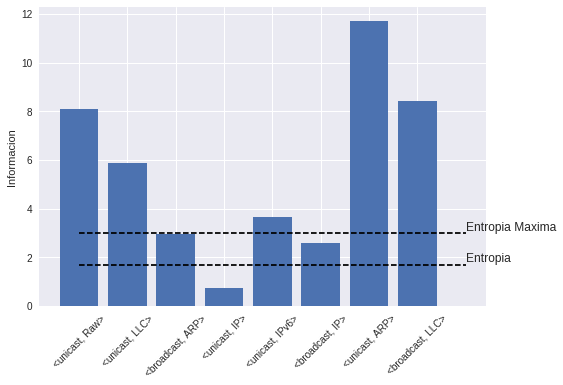

In [3]:
infoEther = dfTableEthernet["information"]
symbolsEther = dfTableEthernet["symbol"]

mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.set_ylabel('Informacion')

plt.bar(range(len(infoEther)), infoEther, align='center')
plt.xticks(range(len(symbolsEther)), symbolsEther,rotation=45)

plt.plot([0, len(symbolsEther)],[dfEntropyEther[0], dfEntropyEther[0]], 'k--', label='Entropia')
plt.text(8, 1.8, 'Entropia')

plt.plot([0,len(symbolsEther)],[dfEntropyEther[1], dfEntropyEther[1]], 'k--', label='Entropia Maxima')
plt.text(8, 3.1, 'Entropia Maxima')

plt.show()

### Labos Ethernet S1: % aparicion de cada simbolo

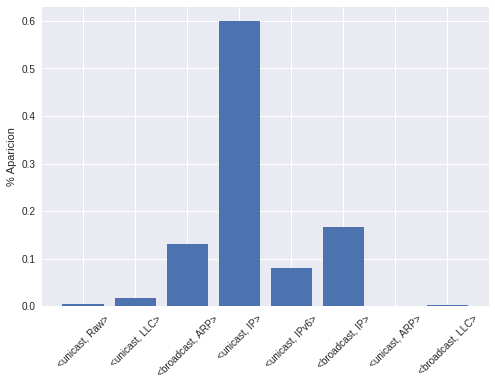

In [4]:
probEther = dfTableEthernet["probability"]

mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.set_ylabel('% Aparicion')

plt.bar(range(len(probEther)), probEther, align='center')
plt.xticks(range(len(symbolsEther)), symbolsEther,rotation=45)

plt.show()

### Labos Ethernet S1: % broadcast sobre el total

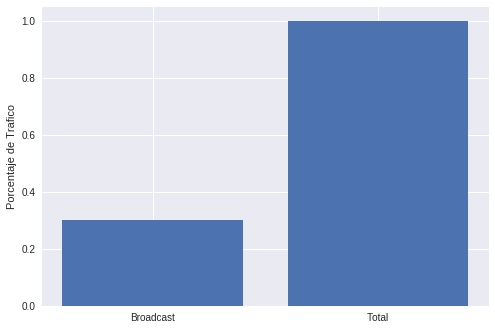

In [13]:
# brEther[0]= probabilidad del broadcast ; brEther[1]= probabilidad total
sumBrEther = sum(dfTableEthernet[dfTableEthernet['symbol'].str.contains('broadcast')]['probability'])
sumTotEther = sum(dfTableEthernet['probability'])
brEther = [sumBrEther, sumTotEther]

mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.set_ylabel('Porcentaje de Trafico')

nombres = ['Broadcast', 'Total']

plt.bar(range(len(brEther)), brEther, align='center')
plt.xticks(range(len(nombres)), nombres)

plt.show()

# Graficos Bufet Inalambrica S1

In [15]:
dfBufet = pd.read_csv("tablas/capturaBuffet_s1_table.csv", sep=";")

#dfEntropyBufet[0] -> entropy  ;   dfEntropyBufet[1] -> max entropy
dfEntropyBufet = dfBufet["probability"][5:].reset_index(drop=True)
dfTableBufet = dfBufet[:5]
#print dfEntropyBufet
#print dfTableBufet

dfBufet

,symbol,probability,information
0,"<unicast, IP>",0.949748,0.074383
1,"<broadcast, IP>",0.016600,5.912680
2,"<unicast, ARP>",0.011110,6.492039
3,"<broadcast, ARP>",0.007363,7.085414
4,"<unicast, IPv6>",0.015179,6.041787
5,entropy,0.384800,NaN
6,max_entropy,2.321928,NaN


### Bufet Inalambrica S1: info y entropia

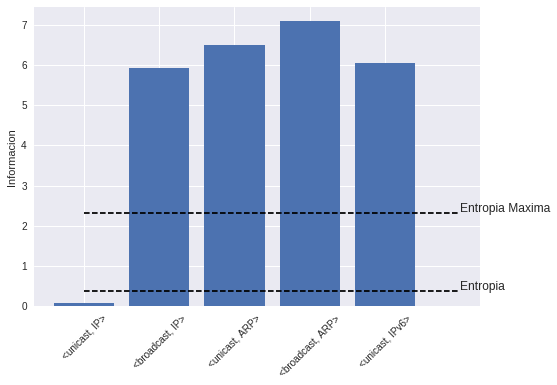

In [16]:
infoBufet = dfTableBufet["information"]
symbolsBufet = dfTableBufet["symbol"]

mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.set_ylabel('Informacion')

plt.bar(range(len(infoBufet)), infoBufet, align='center')
plt.xticks(range(len(symbolsBufet)), symbolsBufet,rotation=45)

plt.plot([0,len(symbolsBufet)],[dfEntropyBufet[0], dfEntropyBufet[0]], 'k--', label='Entropia')
plt.text(5, 0.41, 'Entropia')

plt.plot([0,len(symbolsBufet)],[dfEntropyBufet[1], dfEntropyBufet[1]], 'k--', label='Entropia Maxima')
plt.text(5, 2.35, 'Entropia Maxima')

plt.show()

### Bufet Inalambrica S1: % aparicion de cada simbolo

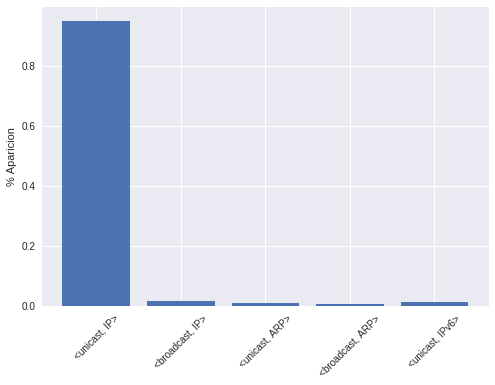

In [17]:
probBufet = dfTableBufet["probability"]

mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.set_ylabel('% Aparicion')

plt.bar(range(len(probBufet)), probBufet, align='center')
plt.xticks(range(len(symbolsBufet)), symbolsBufet,rotation=45)

plt.show()

### Bufet Inalambrica S1: % broadcast sobre el total

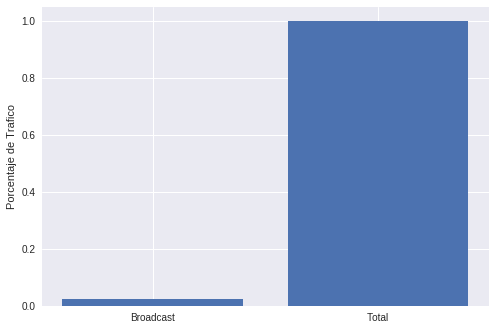

In [22]:
# brBufet[0]= probabilidad del broadcast ; brBufet[1]= probabilidad total
sumBrBufet = sum(dfTableBufet[dfTableBufet['symbol'].str.contains('broadcast')]['probability'])
sumTotBufet = sum(dfTableBufet['probability'])
brBufet = [sumBrBufet, sumTotBufet]

mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.set_ylabel('Porcentaje de Trafico')

nombres = ['Broadcast', 'Total']

plt.bar(range(len(brBufet)), brBufet, align='center')
plt.xticks(range(len(nombres)), nombres)

plt.show()

# Graficos Labos Inalambrica S1

In [19]:
dfLabos = pd.read_csv("tablas/capturaLaboDC_s1_table.csv", sep=";")

#dfEntropyLabos[0] -> entropy  ;   dfEntropyLabos[1] -> max entropy
dfEntropyLabos = dfLabos["probability"][7:].reset_index(drop=True)
dfTableLabos = dfLabos[:7]
#print dfEntropyLabos
#print dfTableLabos

dfLabos

,symbol,probability,information
0,"<broadcast, IP>",0.252349,1.986507
1,"<unicast, ARP>",0.000952,10.036071
2,"<broadcast, ARP>",0.161667,2.628898
3,"<unicast, IP>",0.382337,1.387083
4,"<unicast, LLC>",0.001365,9.517198
5,"<broadcast, LLC>",0.005480,7.511573
6,"<unicast, IPv6>",0.195849,2.352186
7,entropy,1.981019,NaN
8,max_entropy,2.807355,NaN


### Labos Inalambrica S1: info y entropia

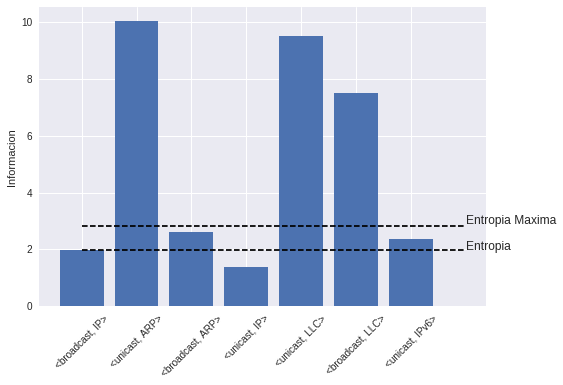

In [20]:
infoLabos = dfTableLabos["information"]
symbolsLabos = dfTableLabos["symbol"]

mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.set_ylabel('Informacion')

plt.bar(range(len(infoLabos)), infoLabos, align='center')
plt.xticks(range(len(symbolsLabos)), symbolsLabos,rotation=45)

plt.plot([0,len(symbolsLabos)],[dfEntropyLabos[0], dfEntropyLabos[0]], 'k--', label='Entropia')
plt.text(7, 1.98, 'Entropia')

plt.plot([0,len(symbolsLabos)],[dfEntropyLabos[1], dfEntropyLabos[1]], 'k--', label='Entropia Maxima')
plt.text(7, 2.9, 'Entropia Maxima')

plt.show()

### Labos Inalambrica S1: % aparicion de cada simbolo

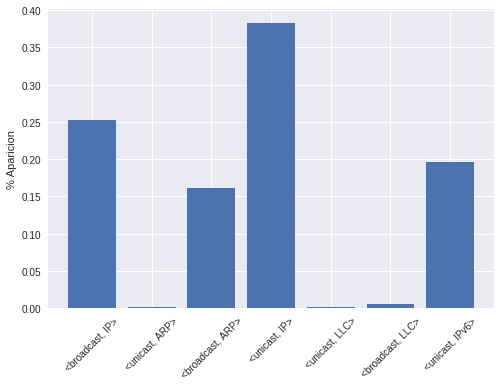

In [21]:
probaLabos = dfTableLabos["probability"]

mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.set_ylabel('% Aparicion')

plt.bar(range(len(probaLabos)), probaLabos, align='center')
plt.xticks(range(len(symbolsLabos)), symbolsLabos,rotation=45)

plt.show()

### Labos Inalambrica S1: % broadcast sobre el total

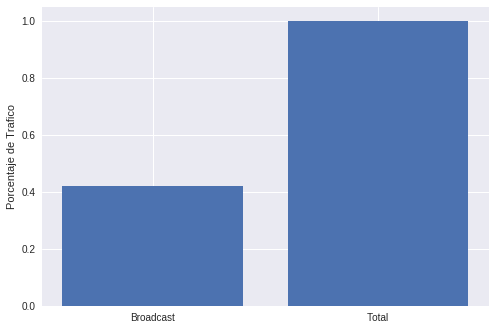

In [23]:
# brLabos[0]= probabilidad del broadcast ; brLabos[1]= probabilidad total
sumBrLabos = sum(dfTableLabos[dfTableLabos['symbol'].str.contains('broadcast')]['probability'])
sumTotLabos = sum(dfTableLabos['probability'])
brLabos = [sumBrLabos, sumTotLabos]

mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.set_ylabel('Porcentaje de Trafico')

nombres = ['Broadcast', 'Total']

plt.bar(range(len(brLabos)), brLabos, align='center')
plt.xticks(range(len(nombres)), nombres)

plt.show()